In [24]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_experiments.library.tomography import StateTomography
from qiskit.visualization import plot_state_city
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.quantum_info import state_fidelity

In [30]:
#Criação do Circuito
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)


In [31]:
# Matriz Ideal
bell_sv = Statevector.from_label('00').evolve(qc)
rho_ideal = DensityMatrix(bell_sv)
print(rho_ideal)

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j]],
              dims=(2, 2))


In [33]:
tomo = StateTomography(qc)

simulator = AerSimulator()
result = tomo.run(simulator, shots=5000).block_for_results()

#Matriz densidade
rho_fit = result.analysis_results("state").value
print("Matriz densidade estimada:\n", rho_fit.data)

Matriz densidade estimada:
 [[ 0.50132506+0.00000000e+00j  0.00341719-1.75865387e-03j
  -0.00565797-4.68781034e-03j  0.49537283+2.80907664e-03j]
 [ 0.00341719+1.75865387e-03j  0.00211251+0.00000000e+00j
   0.00140791-6.46576999e-04j  0.00675007+9.65120341e-04j]
 [-0.00565797+4.68781034e-03j  0.00140791+6.46576999e-04j
   0.00125925+2.71050543e-20j -0.00306831+5.02291046e-03j]
 [ 0.49537283-2.80907664e-03j  0.00675007-9.65120341e-04j
  -0.00306831-5.02291046e-03j  0.49530318+0.00000000e+00j]]


C:\Users\ianre\AppData\Local\Temp\ipykernel_14316\963032125.py:7: DeprecationWarning: Leaving `dataframe` unset or setting it to `False` for `ExperimentData.analysis_results` is deprecated as of qiskit-experiments 0.9.0. Future releases may change the default to `True` and remove the option to set the value to `False`.
  rho_fit = result.analysis_results("state").value


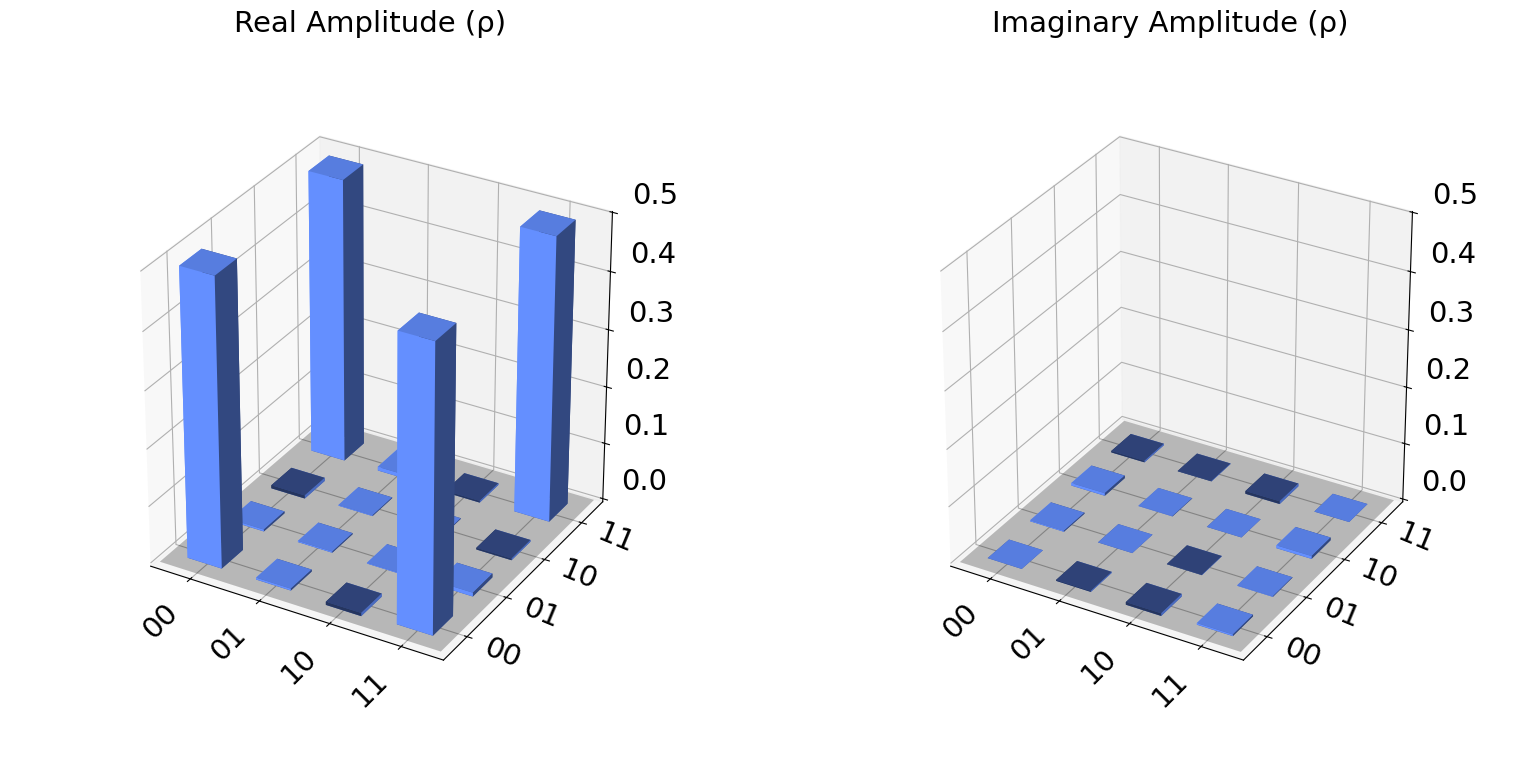

In [34]:
plot_state_city(rho_fit)

In [40]:
fid = state_fidelity(rho_fit, rho_ideal)
print(f"Fidelidade do estado reconstruído: {fid:.5f}")

Fidelidade do estado reconstruído: 0.99369
